# Исследование надежности заемщиков


<h3>Описание проекта</h3>

Исследование проводилось для кредитного отдела банка.

<b>Цель исследования</b>: выяснить как семейное положение и количество детей клиента на факт погашения кредита в срок. Полученные выводы будут использованы для системы построения кредитного скоринга.

Для исследования банком был предоставлен датасет с данными клиентов и наличии или отсутствии у них кредитной задолжности.


**Описание данных**

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита


## Импорт и изучение данных

In [ ]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
try:
    data = pd.read_csv('.../data.csv')
except:
    data = pd.read_csv('.../data.csv')

Выведем первые 20 строчек датафрейма `data` на экран.

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме с помощью метода `info()`.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца.

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце мы обработаем на следующем этапе.

Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`.

In [ ]:
data['total_income'] = data.groupby('income_type')['total_income'].fillna(data['total_income'].median())

### Обработка аномальных значений

В столбце `days_employed` есть записи с отрицательным количеством дней трудового стажа . Заменим все отрицательные значения положительными с помощью метода `abs()`.

In [ ]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получились аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для дальнейшего исследования.

Выведем перечень уникальных значений столбца `children`.

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [ ]:
data = data[~data['children'].isin([-1, 20])]

Выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [ ]:
data['days_employed'] = data.groupby('income_type')['days_employed'].transform(lambda x: x.fillna(x.median()))

Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца.

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [ ]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных и удалим их.

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

Создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование данных

### Связь между количеством детей и возвратом кредита в срок.

Изучим колонку `children` и посмотрим на распределение количества детей у клиентов банка.


0    0.660588
1    0.225400
2    0.096198
3    0.015470
4    0.001922
5    0.000422
Name: children, dtype: float64


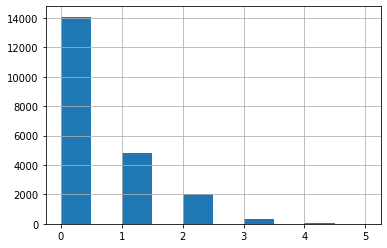

In [ ]:
data['children'].hist()
print(data['children'].value_counts(normalize=True))

Изучим полученные данные:

- У 66% клиентов нет детей,
- У 10% двое дете`,
- У 0.2% четверо детей,
- У 0.05% пятеро детей.

Посмотрим как количество детей связаны с задолжностями.

Сгрупируем данные по столбцу ['children'] и посчитаем % должников для каждой категории.

In [ ]:
group_by_children = data.groupby('children')['debt'].agg(['sum', 'count'])
group_by_children['percentage of debtors'] = group_by_children['sum']/group_by_children['count']* 100
group_by_children.rename(columns = {'sum' : 'number of clients', 'count' : 'number of debtors'}, inplace = True)
group_by_children

,number of clients,number of debtors,percentage of debtors
children,,,
0,1063,14091,7.543822
1,444,4808,9.234609
2,194,2052,9.454191
3,27,330,8.181818
4,4,41,9.756098
5,0,9,0.000000


In [ ]:
print(f'Количество должников среди клиентов с 1 ребенком на {int(9.234609/7.543822*100-100)} % больше, чем у клиентов без детей.')
print(f'Количество должников среди клиентов с 2 ребенком на {int(9.454191/9.234609*100-100)} % больше, чем у клиентов с одним.')

Количество должников среди клиентов с 1 ребенком на 22 % больше, чем у клиентов без детей.
Количество должников среди клиентов с 2 ребенком на 2 % больше, чем у клиентов с одним.


Среди клиентов с детьми выше процент должников. Но зависимость не линейная — с ростом количество детей процент должников не растет. А среди родителей 3х детей он даже падает!

Спишем последнее на отклонение связанное с недостаточным количество наблюдений и сформулируем гипотезу:

**"Клиенты с детьми чаще оказываются должниками, чем клиенты без детей"**.

Проверим нашу гипотезу с помощью статистичесих методов. Найдем p-valeu, используя метод z-тест.

Удалим столбец с клиентами без детей и посчитаем их общие показатели

In [ ]:
total_children = group_by_children.drop(labels = [0],axis = 0)
total_children = total_children[["number of clients", "number of debtors"]].sum()

print(total_children)

number of clients     669
number of debtors    7240
dtype: int64


Вычислим p-valeu. Для этого передаем функции в качестве аргументов количество целевых дейсвий. В нашем случае это наличие задолжности) и количество наблюдений. Родителей 5 детей уберем из рассчета, т.к. там слишком мало данных.

In [ ]:
with_and_without = proportions_ztest([1063,669],[14091,7240])
zero_and_one = proportions_ztest([1063,444],[14091,4808])
One_and_two = proportions_ztest([444,194],[4808,2052])
Three_and_two = proportions_ztest([27,4],[330,41])


#функция, которая меняет отображение малых чисел на более привычное
def fixed_num(n, prec=0):
    return f"{n:.{prec}f}"

#возьмем за альфу 0,05 и напишем фукнцию, которая оценивает статзначимость
def p_valuer(n):
    if n[1] < 0.05:
        return 'статистически значима'
    else:
        return 'статистически не значима'



#распечатаем результат
print(f'P-value кредитоспособности клиентов с детьми и без составляет: {fixed_num(with_and_without[1], 5)}, это значит, что разница {p_valuer(with_and_without)}.')
print(f'P-value кредитоспособности клиентов без детей и с одним ребенком: {fixed_num(zero_and_one[1], 5)}, это значит, что разница {p_valuer(zero_and_one)}.')
print(f'P-value кредитоспособности клиентов с 1-2 детьми: {fixed_num(One_and_two[1], 5)}, это значит, что разница {p_valuer(One_and_two)}.')
print(f'P-value кредитоспособности клиентов с 2-3 детьми составляет: {fixed_num(One_and_two[1], 5)}, это значит, что разница {p_valuer(One_and_two)}.')



P-value кредитоспособности клиентов с детьми и без составляет: 0.00002, это значит, что разница статистически значима.
P-value кредитоспособности клиентов без детей и с одним ребенком: 0.00019, это значит, что разница статистически значима.
P-value кредитоспособности клиентов с 1-2 детьми: 0.77433, это значит, что разница статистически не значима.
P-value кредитоспособности клиентов с 2-3 детьми составляет: 0.77433, это значит, что разница статистически не значима.


**Вывод:**
Клиенты с детьми на 22% чаще оказываются должниками. Разница статистически значима и на этот показтель можно ориентироваться при скоринге клиентов.

### Зависимость между семейным положением и возвратом кредита в срок.

Сгруппируем данные по семейному положения и смотрим на процент должников для каждой категории.

In [ ]:
group_by_family_status = pd.DataFrame(data.groupby('family_status')['family_status'].count())
group_by_family_status['number of debtors'] = data.groupby('family_status')['debt'].sum()
group_by_family_status['percentage of debtors'] =  group_by_family_status['number of debtors']/group_by_family_status['family_status']*100
group_by_family_status.rename(columns = {'family_status' : 'total_clients'}, inplace = True)

print(group_by_family_status)

                       total_clients  number of debtors  percentage of debtors
family_status                                                                 
Не женат / не замужем           2796                273               9.763948
в разводе                       1189                 84               7.064760
вдовец / вдова                   951                 63               6.624606
гражданский брак                4134                385               9.313014
женат / замужем                12261                927               7.560558


Визуально данные делятся на две категории по признаку наличия официального брака:
- Более надежная категория (группа А): "в разводе", "вдовец / вдова", "женат / замужем"
- Менее надежная категория (группа B): "Не женат / не замужем", "гражданский брак"

Объединим наблюдения в эти две группы и посчитаем статзначимость.

In [ ]:
# Суммирование общего количества клиентов и должников в группе A и B
A_total = group_by_family_status.loc[["в разводе", "вдовец / вдова", "женат / замужем"], 'total_clients'].sum()
A_debs = group_by_family_status.loc[["в разводе", "вдовец / вдова", "женат / замужем"], 'number of debtors'].sum()
B_total = group_by_family_status.loc[["Не женат / не замужем", "гражданский брак"], 'total_clients'].sum()
B_debs = group_by_family_status.loc[["Не женат / не замужем", "гражданский брак"], 'number of debtors'].sum()

# Вычисление процента должников
A_debt_percent = (A_debs / A_total) * 100
B_debt_percent = (B_debs / B_total) * 100

# Создание таблицы с результатами
ab = pd.DataFrame({'group': ['Group A', 'Group B'], 'debt_percent': [A_debt_percent, B_debt_percent]})
print(ab)
print()

# Вычисление p-value
A_and_B = proportions_ztest([A_debs, B_debs], [A_total, B_total])


print(f'P-value для разницы между группами составляет {fixed_num(A_and_B[1], 5)}.')
print(f'Количество клиентов с задолженностью в группе B больше на {(B_debt_percent / A_debt_percent * 100) - 100}%.')


     group  debt_percent
0  Group A      7.457815
1  Group B      9.494949

P-value незамужних и замужних составляет 0.00000, это значит, что разница статистически значима.
Количество клиентов с задолжность в группе B больше на 27.31542614224179%


**Вывод**: Официальный брак в настоящем или прошлом, говорит о более дисциплинированном заемщике. Клиенты делятся на две группы:
- Более надежная категория "официальный брак": "в разводе", "вдовец / вдова", "женат / замужем"
- Менее надежная категория "без официального брака": "Не женат / не замужем", "гражданский брак"

Количество клиентов c задолжность в менее надежной категории больше на 27.3%

### Зависимость между уровнем дохода и возвратом кредита в срок.

In [ ]:
group_by_income_category = pd.DataFrame(data.groupby('total_income_category')['debt'].count())
group_by_income_category['number of debtors'] = data.groupby('total_income_category')['debt'].sum()
group_by_income_category['percentage of debtors'] =  group_by_income_category['number of debtors']/group_by_income_category['debt']*100
group_by_income_category.rename(columns = {'debt' : 'total_clients'}, inplace = True)


print(group_by_income_category)


                       total_clients  number of debtors  percentage of debtors
total_income_category                                                         
A                                 25                  2               8.000000
B                               5014                354               7.060231
C                              15921               1353               8.498210
D                                349                 21               6.017192
E                                 22                  2               9.090909


Значений в категериях A, D, E мало для статистического анализа. Поэтому посчитаем стазначимость между категориями дохода B и С.

In [ ]:
B_and_C = proportions_ztest([354,1353],[5014,15921])


print(f'P-value составляет {fixed_num(B_and_C[1], 5)}, это значит, что разница {p_valuer(B_and_C)}.')
print(f'Процент клиентов с задолжность среди категории C выше чем у B на {(1353/15921*100)/(354/5014*100)*100-100}%')

P-value составляет 0.00118, это значит, что разница статистически значима.
Процент клиентов с задолжность среди категории C выше чем у B на 20.367300836013385%


**Вывод:**  Более состоятельные клиенты (категория B) на 20% реже допускают задолжности, чем менее состоятельные (категория C). Ситуация кажется предсказуемой — чем больше доход, тем больше возможность платить.

Важно отметить, что данные по более низким категорям дохода нет смысла анализировать не только из-за малого количества наблюдений, но и из-за систематической ошибки выжившего. Большинство клиентов с низким доходом просто не получили кредит, а те кто получил скорее всего были надежны по всем остальным критериям.

###Связь целей кредита на его возврат в срок.

In [ ]:
group_by_purpose_category = pd.DataFrame(data.groupby('purpose_category')['debt'].count())
group_by_purpose_category['number of debtors'] = data.groupby('purpose_category')['debt'].sum()
group_by_purpose_category['percentage of debtors'] =  group_by_purpose_category['number of debtors']/group_by_purpose_category['debt']*100
group_by_purpose_category.rename(columns = {'debt' : 'total_clients'}, inplace = True)

print(group_by_purpose_category)


                          total_clients  number of debtors  \
purpose_category                                             
операции с автомобилем             4279                400   
операции с недвижимостью          10751                780   
получение образования              3988                369   
проведение свадьбы                 2313                183   

                          percentage of debtors  
purpose_category                                 
операции с автомобилем                 9.347978  
операции с недвижимостью               7.255139  
получение образования                  9.252758  
проведение свадьбы                     7.911803  


Снова наблюдения делятся на две категории по цели получения кредита:
- Меньшая надежность: автомобили и образование
- Более высокая надежность: недвижимость и свадьба

Сгрупируем данные и посчитаем статзначимость различий.

In [ ]:
A_total = group_by_purpose_category.loc[["операции с автомобилем", "получение образования"],['total_clients']].sum()
A_total = A_total[0]
A_debs = group_by_purpose_category.loc[["операции с автомобилем", "получение образования"],['number of debtors']].sum()
A_debs = A_debs[0]
B_total = group_by_purpose_category.loc[["операции с недвижимостью", "проведение свадьбы"],['total_clients']].sum()
B_total = B_total[0]
B_debs = group_by_purpose_category.loc[["операции с недвижимостью", "проведение свадьбы"],['number of debtors']].sum()
B_debs = B_debs[0]

A_and_B = proportions_ztest([A_debs,B_debs],[A_total,B_total])


print(f'P-value двух групп {fixed_num(A_and_B[1], 5)}, это значит, что разница {p_valuer(A_and_B)}.')

P-value двух групп 0.00000, это значит, что разница статистически значима.


**Вывод**:
Значимость подтвердилась. Менее надёжными оказались автомобили и образование, а более надежными недвижимость и свадьба.

## Общий вывод.

**Исследование и обработка данных**

В ходе исследования был выявлен и устранен ряд проблем в данных:

- Столбцы `days_employed` и `total_income` имели пропущенные значения. Эти значения были заменены медианными значениями согласно типу занятости.
- При этом у двух типов `income_type` — безработных и пенсионеров аномально большие медиальные значения дохода.
- Столбец `days_employed` содержал отрицательные данные. Отрицательные значения были переведын в положительные.
- В датасете в столбце `children` были значения -1, 20. Строки с этими значениями были удалены из исследования.

**Рекомендации в будущем**

Возможно, причины проблем пропущенных значений `days_employed` и `total_income` связаны с человеческим фактором — некоторые люди отказываются указывать эти значения. Если это действительно так, то рекомендуем сделать эти строки анкеты обязательными для заполнения.

Завышенные медианные значения дохода у безработных и пенсионеров тоже могут быть связаны с человеческим фактором — люди завышают свои реальные доходы. Тогда стоит проверить как устроено подтверждение дохода.

Проблемы с отрицательными значениями столбцов `days_employed` и `children` скорее носят технический характер. Рекомендуется проверить как заносятся эти данные.

**Выводы**

В ходе исследования было выделен ряд характеристик, которые ухудшают прогноз — уменьшают вероятность возврата кредита в срок.
К факторам ухудшающий прогноз относятся:
- Наличие 1 и более детей
- Не женат / не замужем, гражданский брак
- Цель кредита "автомобили и образование"
- Низкий уровень дохода


К факторам улучшающим прогноз относятся:
- Отсуствие детей
- Наличие в настоящем или прошлом официального брака
- Цель кредита "недвижимость и свадьба"
- Более высокй уровень дохода

